<a href="https://colab.research.google.com/github/helgadenes/Astrophysics_yachay/blob/main/python_tutorials/HR-diagram/pleiades_proper_motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identifying the Pleiades open cluster using proper motion data

Inspired by this tutorial: https://starry-project.eu/tutorial/

This tutorial:
- downloads data from the **GAIA DR3** data release in the direction of the Pleiades open cluster
- demosntrates the data with some simple plots
- creates an HR diagram for the Pleiades cluster


Information on data access: https://astroquery.readthedocs.io/en/latest/gaia/gaia.html  

Information on open clusters and the HR diagram: https://github.com/helgadenes/Astrophysics_yachay/blob/main/Slides/Astro_3.2.pdf

More information on the Pleiades star cluster: https://en.wikipedia.org/wiki/Pleiades

In [50]:
# astroquery is not a default package in google colab so we need to install it every time we start a session
!pip install astroquery

In [2]:
# Loading the libraries that we are going to use

# standard python libraries:
import numpy as np
import matplotlib.pyplot as plt

# astronomy specific libraries:
from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates import SkyCoord

In [3]:
# Define the source of the data
# This is defining which data table we want to use from the GAIA data base

Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"  # Reselect Data Release 3, default
Gaia.ROW_LIMIT = -1  # this will get us an unlimited number of raws of data, you can set this to a set number as well to get a smaller table


In [6]:
# Defining the location of the star cluster that we are going to use, in this case the Pleiades cluster
# The SkyCoord package can recognise the names of astronomical objects

c = SkyCoord.from_name('Pleiades')

print(c.ra.deg, c.dec.deg)

56.601 24.114


In [7]:
# Searching for the data
# We do a box search around specific coordinates
# This may take a bit of time - there are millions of objects in the GAIA data base

# First, we define the box:
coord = SkyCoord(ra=c.ra.deg, dec=c.dec.deg, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(2.0, u.deg)
height = u.Quantity(2.0, u.deg)

# We search the Gaia data base and download the data:
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

# We inspect a section of the results:
r.pprint(max_lines=12, max_width=130)

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
        dist             solution_id            designation         ... ebpminrp_gspphot_upper libname_gspphot
                                                                    ...          mag                          
-------------------- ------------------- -------------------------- ... ---------------------- ---------------
0.006337645533631022 1636148068921376768 Gaia DR3 65225091345088128 ...                     --                
0.006440119370323977 1636148068921376768 Gaia DR3 65225130001307776 ...                     --                
0.009046829012056418 1636148068921376768 Gaia DR3 65225095641479808 ...                 0.2611         PHOENIX
                 ...                 ...                        ... ...                    ...             ...
  1.3455135659768918 1636148068921376768 Gaia DR3 65049689175417472 ...                     --                
  1.3465238710266207 1636148068921376768 Gaia DR3 641721371619

In [8]:
# Checking the keys in the data set:
# This tells us what data columns we have in the table, coordinates, parallax measurment, magnitudes,colours, etc ...

r.keys()

['dist',
 'solution_id',
 'designation',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pm',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'nu_eff_used_in_astrometry',
 'pseudocolour',
 'pseudocolour_error',
 'ra_pseudocolour_corr',
 'dec_pseudocolour_corr',
 'parallax_pseudocolour_corr',
 'pmra_pseudocolour_corr',
 'pmdec_pseudocolour_corr',
 'astrometric_matched_transits',
 'visibility_periods_used',
 'astrometric_si

## Test plots

### Can you identify the Pleiades cluster in the data?

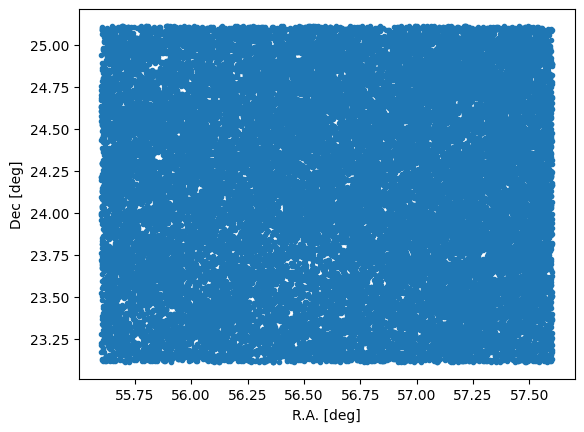

In [9]:
# Let's plot where are the stars in the sky (R.A. and Dec)

fig, ax = plt.subplots()
plt.plot(r['ra'], r['dec'], linestyle='', marker='.' )
ax.set_xlabel(r'R.A. [deg]')
ax.set_ylabel(r'Dec [deg]')
plt.show()

## Proper motion

Proper motion is the astrometric measure of the observed changes in the apparent places of stars or other celestial objects in the sky, as seen from the center of mass of the Solar System, compared to the abstract background of the more distant stars.

More details: https://en.wikipedia.org/wiki/Proper_motion

### Remember what we know about star clusters.
### How do stars move in a star cluster compared to us?

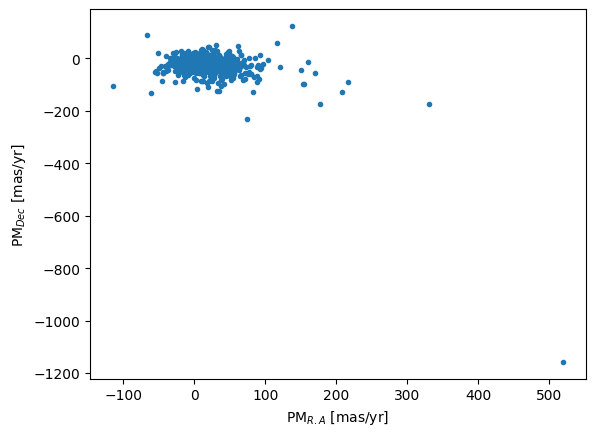

In [10]:
# Let's plot the proper motion in R.A. and Dec -> this is how the stars move in the plane of the sky
# The units of proper motion are milliarcsecond per year

fig, ax = plt.subplots()
plt.plot(r['pmra'], r['pmdec'], linestyle='', marker='.' )
ax.set_xlabel(r'PM$_{R.A}$ [mas/yr]')
ax.set_ylabel(r'PM$_{Dec}$ [mas/yr]')
plt.show()

## Analysing the proper motion data

Star clusters were born together -> when they are young they should move the same way. -> Their proper motion should be the same.

**What do you notice from the plot?**

**Can you find the Pleiades cluster?**

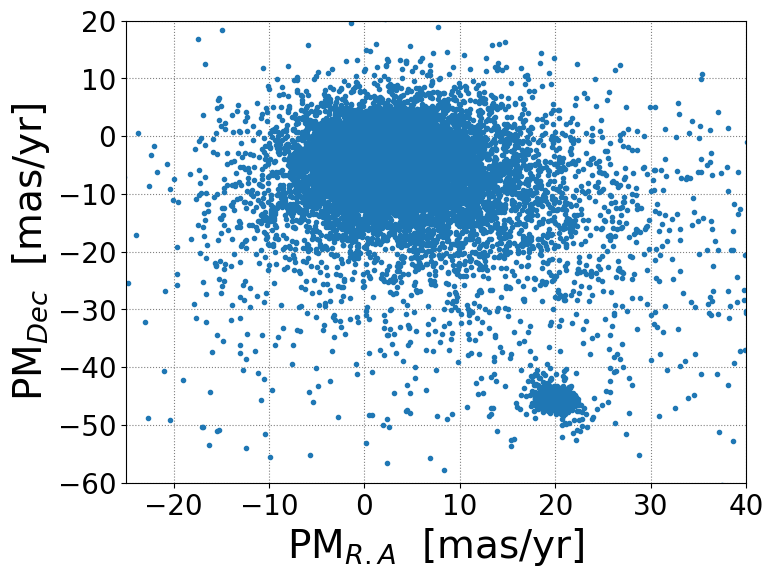

In [51]:
# Let's restrict the axes to zoom in on our data

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r['pmra'], r['pmdec'], linestyle='', marker='.' )
plt.xlabel("PM$_{R.A}$  [mas/yr]", fontsize=28)
plt.ylabel('PM$_{Dec}$  [mas/yr]', fontsize=28)

plt.xlim(-25,40)
plt.ylim(-60,20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

## The HR diagram for the full data set

**What do you notice?**

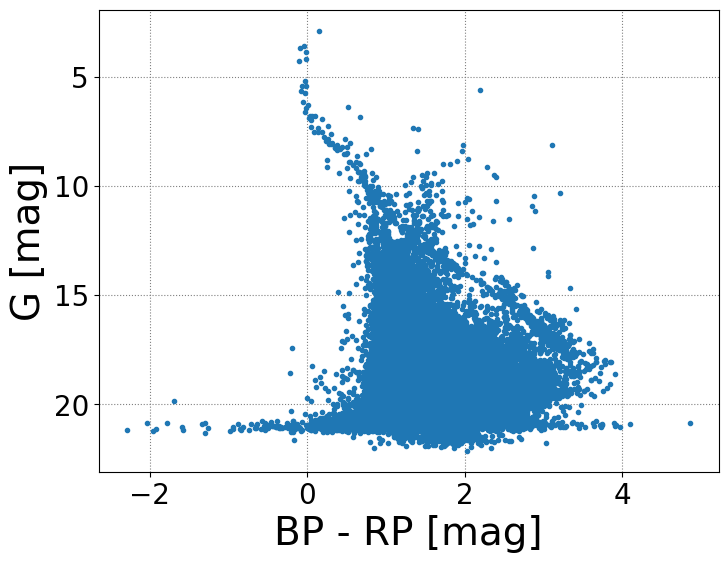

In [15]:
# Plotting the HR diagram: colour vs. magnitude using all the data that we downloaded

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r['bp_rp'], r['phot_g_mean_mag'], linestyle='', marker='.' )
plt.xlabel("BP - RP [mag]", fontsize=28)
plt.ylabel('G [mag]', fontsize=28)

ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

## Selecting the Pleiades star cluster based on the proper motion of the stars

The Peiades cluster is the smaller clump in the proper motion diagram.

In [16]:
# Creating a data frame with a sub set of the data that only contains the stars of the Pleiades cluster
# This selection is based on the proper motion of the stars

mask = (r['pmra'] < 25) & (r['pmra'] > 15) & (r['pmdec'] < -40) & (r['pmdec'] > -50)  # Makes a boolean selection mask (numpy array)
r_P = r[mask]  # Makes a new astropy Table


In [17]:
# Number of rows in the new sub table:
# The sub table is much smaller than the original data table

len(r_P)

594

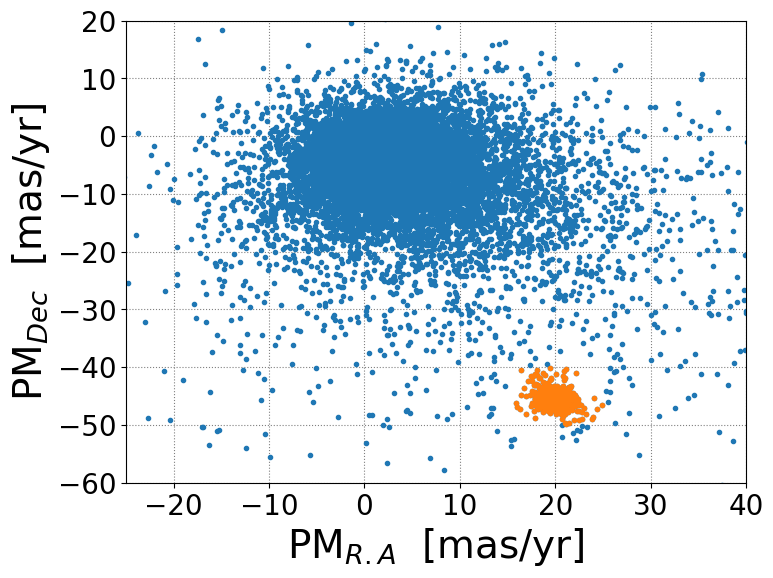

In [18]:
# Let's check which stars we selected:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r['pmra'], r['pmdec'], linestyle='', marker='.' )
plt.plot(r_P['pmra'], r_P['pmdec'], linestyle='', marker='.' )
plt.xlabel("PM$_{R.A}$  [mas/yr]", fontsize=28)
plt.ylabel('PM$_{Dec}$  [mas/yr]', fontsize=28)

plt.xlim(-25,40)
plt.ylim(-60,20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

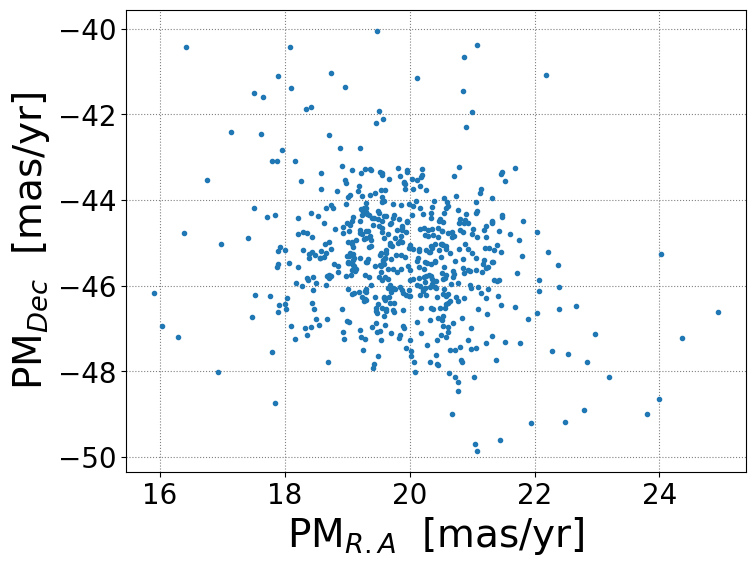

In [19]:
# Zoom in on the selected stars

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_P['pmra'], r_P['pmdec'], linestyle='', marker='.' )
plt.xlabel("PM$_{R.A}$  [mas/yr]", fontsize=28)
plt.ylabel('PM$_{Dec}$  [mas/yr]', fontsize=28)

ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

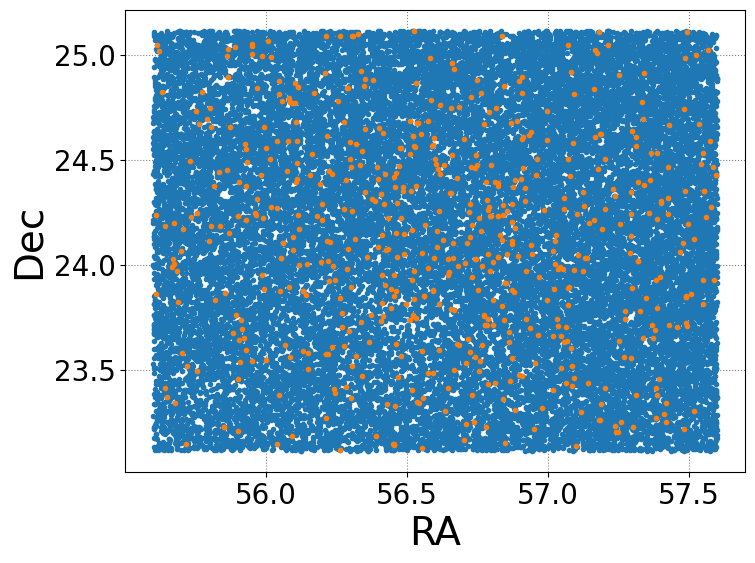

In [20]:
# Where are these stars located in the sky?

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r['ra'], r['dec'], linestyle='', marker='.' )
plt.plot(r_P['ra'], r_P['dec'], linestyle='', marker='.' )
plt.xlabel("RA", fontsize=28)
plt.ylabel('Dec', fontsize=28)

ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

**The proper motion is a powerfull method to identify star clusters.**

### How does the HR diagram look for the selected stars?

### Is this what we expect?

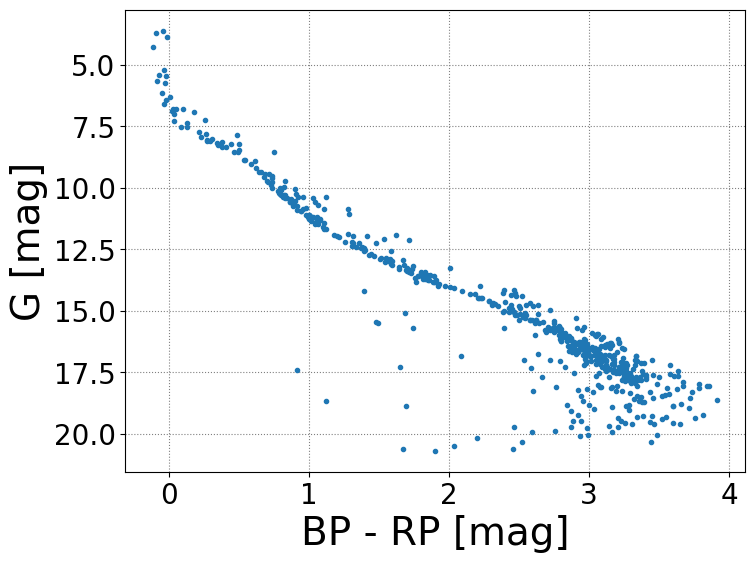

In [21]:
# Let's make the HR diagram for the selected stars only

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_P['bp_rp'], r_P['phot_g_mean_mag'], linestyle='', marker='.' )
plt.xlabel("BP - RP [mag]", fontsize=28)
plt.ylabel('G [mag]', fontsize=28)

ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

## Let's add another cluster to compare to the Pleiades

We will get data for the NGC 752 open cluster (https://en.wikipedia.org/wiki/NGC_752)

In [52]:
# Let's get the coordinates:

c_2 = SkyCoord.from_name('NGC 752')

print(c_2.ra.deg, c_2.dec.deg)

29.223 37.794


In [23]:
# Searching for the data
# Box search around specific coordinates

coord = SkyCoord(ra=c_2.ra.deg, dec=c_2.dec.deg, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(2.0, u.deg)
height = u.Quantity(2.0, u.deg)
r_2 = Gaia.query_object_async(coordinate=coord, width=width, height=height)


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


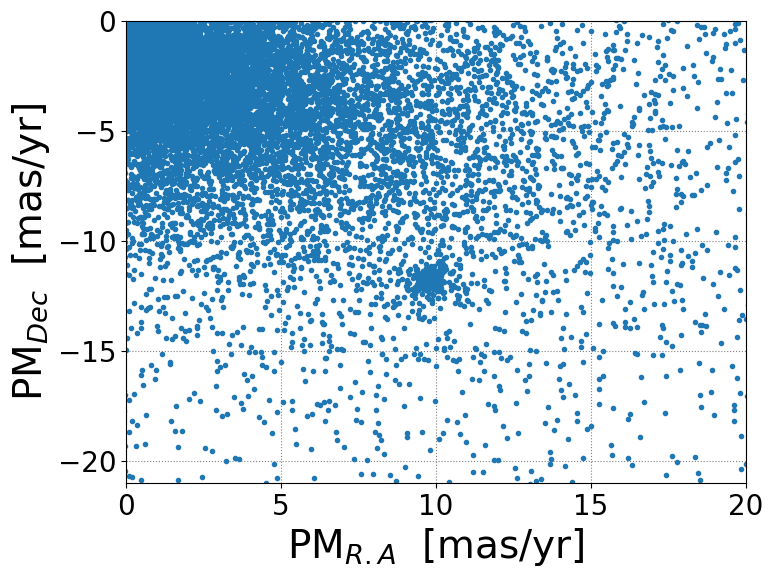

In [24]:
# Let's check what we got using the proper motion of the stars
# Can you identify the star cluster?

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_2['pmra'], r_2['pmdec'], linestyle='', marker='.' )
plt.xlabel("PM$_{R.A}$  [mas/yr]", fontsize=28)
plt.ylabel('PM$_{Dec}$  [mas/yr]', fontsize=28)

plt.xlim(0,20)
plt.ylim(-21,0)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [44]:
# Creating a data frame with a sub set of the data

mask = (r_2['pmra'] < 12) & (r_2['pmra'] > 8) & (r_2['pmdec'] < -10) & (r_2['pmdec'] > -13)  # Makes a boolean selection mask (numpy array)
r_C2 = r_2[mask]  # Makes a new astropy Table

In [45]:
# Number of rows in the new sub array

len(r_C2)

400

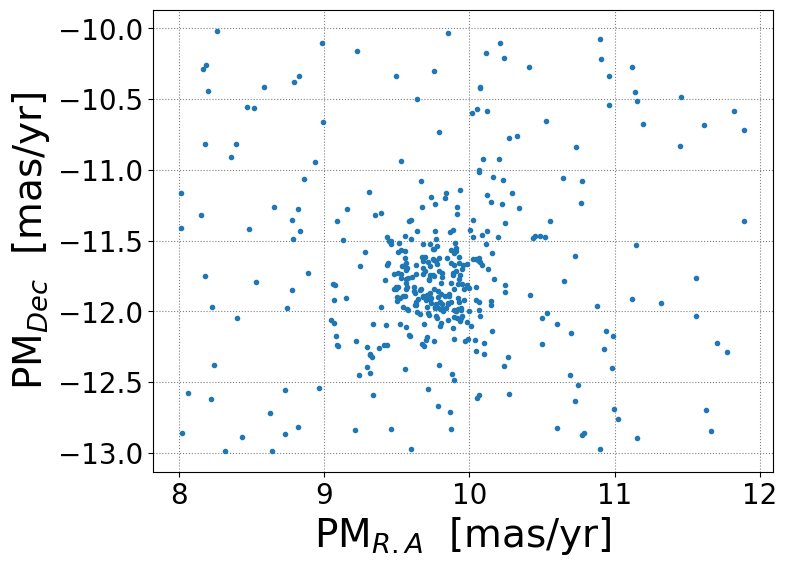

In [46]:
# Checking the selected data in proper motion

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_C2['pmra'], r_C2['pmdec'], linestyle='', marker='.' )
plt.xlabel("PM$_{R.A}$  [mas/yr]", fontsize=28)
plt.ylabel('PM$_{Dec}$  [mas/yr]', fontsize=28)

ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

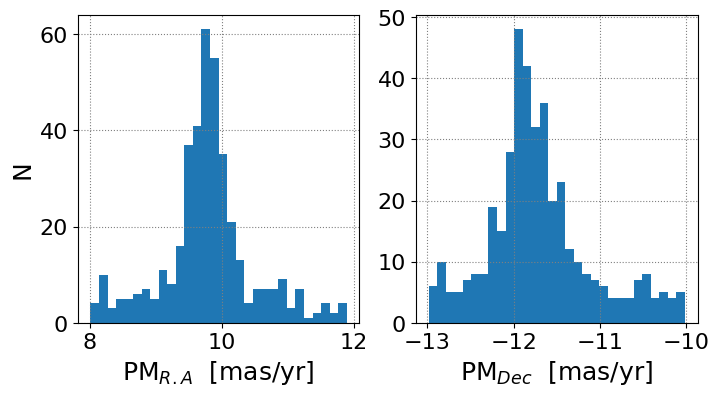

In [49]:
# Let's look at some histograms for the proper motion to evaluate our selection:

fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(121)
plt.grid(linestyle=':', color='grey')
plt.hist(r_C2['pmra'], bins=30 )
plt.xlabel("PM$_{R.A}$  [mas/yr]", fontsize=18)
plt.ylabel('N', fontsize=18)

ax2 = fig.add_subplot(122)
plt.grid(linestyle=':', color='grey')
plt.hist(r_C2['pmdec'], bins=30 )
plt.xlabel("PM$_{Dec}$  [mas/yr]", fontsize=18)

ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

plt.show()

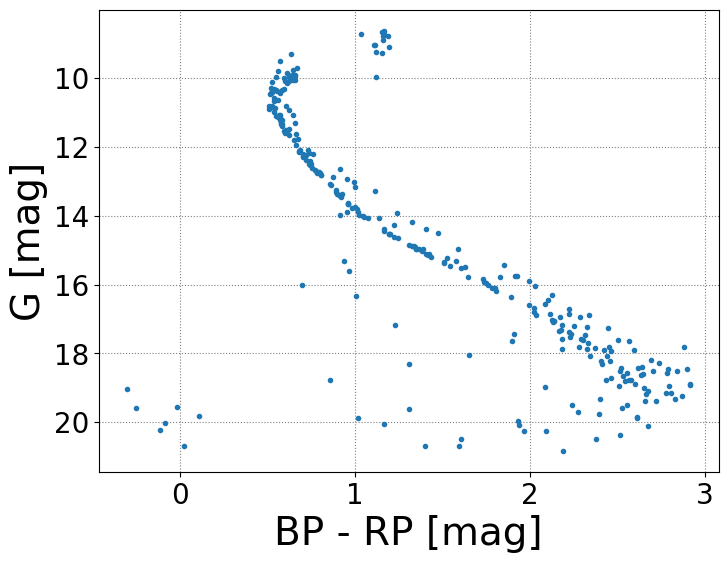

In [43]:
# Let's make the HR diagram

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_C2['bp_rp'], r_C2['phot_g_mean_mag'], linestyle='', marker='.' )
plt.xlabel("BP - RP [mag]", fontsize=28)
plt.ylabel('G [mag]', fontsize=28)

ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

## Comparing the two star clusters

**Which cluster is younger?**

**What is the reason of the offsets?**

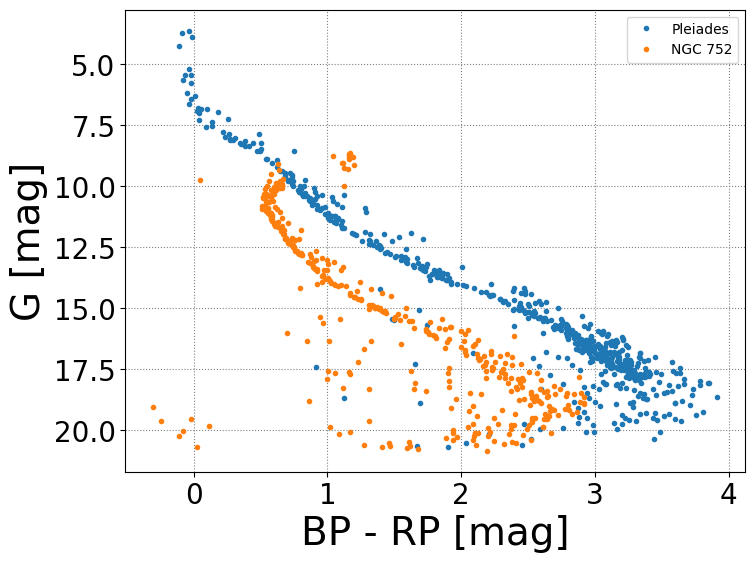

In [29]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_P['bp_rp'], r_P['phot_g_mean_mag'], linestyle='', marker='.' , label='Pleiades')
plt.plot(r_C2['bp_rp'], r_C2['phot_g_mean_mag'], linestyle='', marker='.' , label='NGC 752')
plt.xlabel("BP - RP [mag]", fontsize=28)
plt.ylabel('G [mag]', fontsize=28)

ax.invert_yaxis()
plt.legend()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

## Making a function to get data for various star clusters

Once we are happy that our code performs what we want, e.g. it makes an HR diagram, we can automate some of the selection as well with a function.

**How do we know the proper motion of the cluster?**

We can check this in teh CDS Simbad data base: https://simbad.cds.unistra.fr/simbad/
1. Search the name of the object in the "Basic Search" section
2. Look for: "Proper motions mas/yr"

In [ ]:
# A function that downloads the data and makes a selection in proper motion:

def get_cluster_data(name, box, proper_motion_lim):
    c = SkyCoord.from_name(name)

    coord = SkyCoord(ra=c.ra.deg, dec=c.dec.deg, unit=(u.degree, u.degree), frame='icrs')
    width = u.Quantity(box[0], u.deg)
    height = u.Quantity(box[1], u.deg)
    r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

    # creating a data frame with a sub set of the data

    mask = (r['pmra'] < proper_motion_lim[1]) & (r['pmra'] > proper_motion_lim[0]) & (r['pmdec'] < proper_motion_lim[3]) & (r['pmdec'] > proper_motion_lim[2])  # Makes a boolean selection mask (numpy array)
    r_P = r[mask]  # Makes a new astropy Table

    return r_P

In [ ]:
# Executing the function to get data for NGC 752

ngc_752 = get_cluster_data('NGC 752', [2.0, 2.0], [8, 12, -13, -10])

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


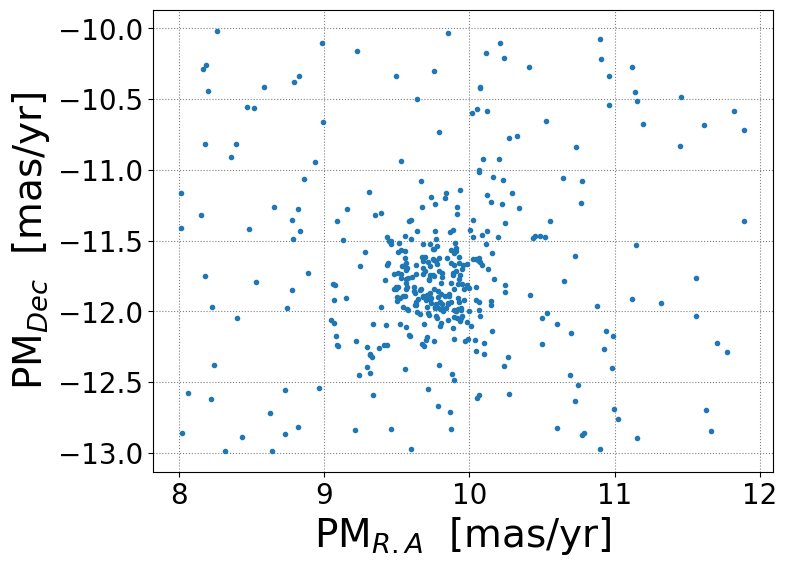

In [ ]:
# Making a plot of our data:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(ngc_752['pmra'], ngc_752['pmdec'], linestyle='', marker='.' )
plt.xlabel("PM$_{R.A}$  [mas/yr]", fontsize=28)
plt.ylabel('PM$_{Dec}$  [mas/yr]', fontsize=28)

ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

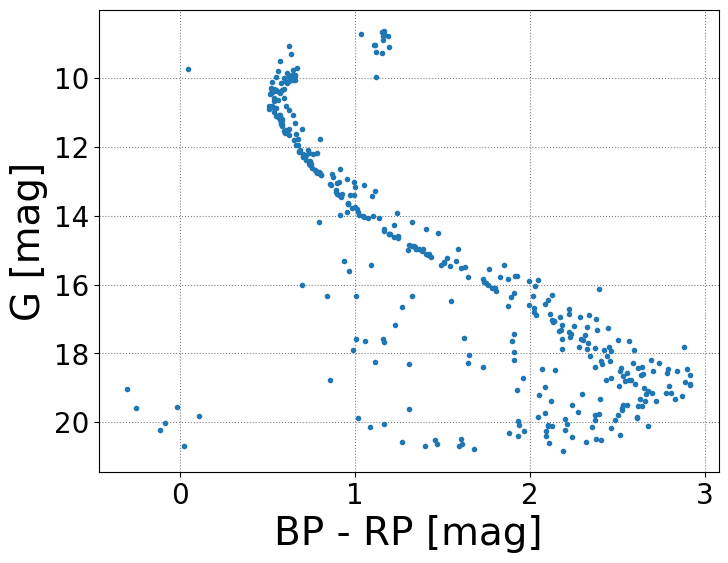

In [ ]:
# Making the HR diagram:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(ngc_752['bp_rp'], ngc_752['phot_g_mean_mag'], linestyle='', marker='.' )
plt.xlabel("BP - RP [mag]", fontsize=28)
plt.ylabel('G [mag]', fontsize=28)

ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()